In [0]:
import numpy as np 
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense

from keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

In [0]:
def plot_img(img):
  plt.imshow(img.reshape(28,28),cmap = 'gray')

Image is of : 8


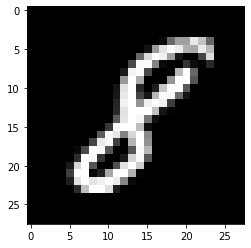

In [19]:
plot_img(x_train[7777])
print("Image is of :",y_train[7777])

# Model Building

In [22]:
  x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [25]:
print(x_train.shape)
print(x_test.shape) 

(60000, 784)
(10000, 784)


In [0]:
model = Sequential()
model.add( Dense(units = 32,activation='relu',input_shape = (784,))) #input shape only for first layer
model.add( Dense(units = 64,activation='relu'))
model.add( Dense(units = 128,activation='relu'))
model.add( Dense(units = 32,activation='relu'))
model.add( Dense(units =10,activation='softmax')) # final softmax gives the probability

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 40,010
Trainable params: 40,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
# adam/sgd/rmsprop

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [31]:
y_train.shape

(60000,)

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
y_train.shape

(60000, 10)

In [35]:
y_test.shape

(10000, 10)

In [36]:
hist = model.fit(x = x_train, y = y_train,batch_size=32,epochs = 10,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.6414 - accuracy: 0.8470 - val_loss: 0.2965 - val_accuracy: 0.9138
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2386 - accuracy: 0.9334 - val_loss: 0.2084 - val_accuracy: 0.9432
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.1871 - accuracy: 0.9460 - val_loss: 0.1853 - val_accuracy: 0.9472
Epoch 4/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.1609 - accuracy: 0.9537 - val_loss: 0.1913 - val_accuracy: 0.9490
Epoch 5/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.1390 - accuracy: 0.9606 - val_loss: 0.1631 - val_accuracy: 0.9555
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.1248 - accuracy: 0.9640 - val_loss: 0.1463 - val_accuracy: 0.9596
Epoch 7/10
60000/60000 [==============================] - 3s 57us/st

In [37]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 23us/step


[0.1558152527358383, 0.9617000222206116]

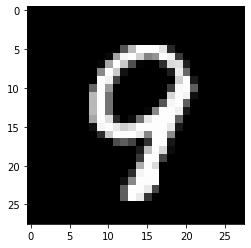

In [46]:
plot_img(x_test[5001])

In [0]:
y_pred = model.predict_classes(x_test)

In [45]:
y_pred[5001]

9

In [48]:
model.predict_classes(x_test[[5000]])

array([3])